<a href="https://colab.research.google.com/github/DheerajDinesh/CognoRise_Infotech_MachineLearning/blob/main/EMOJI_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import nltk

map = pd.read_csv('/content/drive/MyDrive/CognoRise Infotech/Machine Learning/Emoji_Prediction/Mapping.csv')
map.drop(['Unnamed: 0'], axis = 1, inplace = True)
map

,emoticons,number
0,😜,0
1,📸,1
2,😍,2
3,😂,3
4,😉,4
5,🎄,5
6,📷,6
7,🔥,7
8,😘,8
9,❤,9


In [ ]:
map['emoticons'].value_counts()

emoticons
😜     1
📸     1
💜     1
😊     1
😎     1
💕     1
💙     1
✨     1
☀     1
🇺🇸    1
😁     1
❤     1
😘     1
🔥     1
📷     1
🎄     1
😉     1
😂     1
😍     1
💯     1
Name: count, dtype: int64

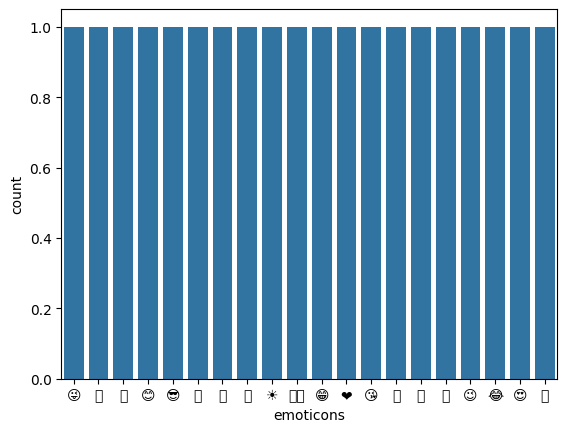

In [ ]:
sns.countplot(map['emoticons'].value_counts())
warnings.filterwarnings('ignore')  # values are unique

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/CognoRise Infotech/Machine Learning/Emoji_Prediction/Train.csv')
train_df.drop(['Unnamed: 0'], axis = 1, inplace = True)
train_df

,TEXT,Label
0,Vacation wasted ! #vacation2017 #photobomb #ti...,0
1,"Oh Wynwood, you’re so funny! : @user #Wynwood ...",1
2,Been friends since 7th grade. Look at us now w...,2
3,This is what it looks like when someone loves ...,3
4,RT @user this white family was invited to a Bl...,3
...,...,...
69995,"Yes, I call Galina ""my Bubie"" Go follow my bea...",3
69996,"I SEA you, Seattle @ Ballard Seafood Festival\n",16
69997,If one of my daughters is wearing this and ask...,2
69998,Guess who whoop people on THEIR homecoming?! #...,3


In [ ]:
train_df.head()

,TEXT,Label
0,Vacation wasted ! #vacation2017 #photobomb #ti...,0
1,"Oh Wynwood, you’re so funny! : @user #Wynwood ...",1
2,Been friends since 7th grade. Look at us now w...,2
3,This is what it looks like when someone loves ...,3
4,RT @user this white family was invited to a Bl...,3


In [ ]:
train_df.tail()

,TEXT,Label
69995,"Yes, I call Galina ""my Bubie"" Go follow my bea...",3
69996,"I SEA you, Seattle @ Ballard Seafood Festival\n",16
69997,If one of my daughters is wearing this and ask...,2
69998,Guess who whoop people on THEIR homecoming?! #...,3
69999,We Love you Robbie @ Heritage Memorial Cemeter...,14


In [ ]:
train_df.isna().sum()

TEXT     0
Label    0
dtype: int64

In [ ]:
train_df.dtypes

TEXT     object
Label     int64
dtype: object

In [ ]:
count = train_df['Label'].value_counts()
count

Label
9     15091
2      7076
3      6842
7      4363
15     3843
13     3250
16     2832
17     2751
1      2592
11     2434
14     2342
6      2083
8      1992
5      1977
12     1909
4      1878
19     1745
18     1722
10     1721
0      1557
Name: count, dtype: int64

<Axes: xlabel='Label', ylabel='count'>

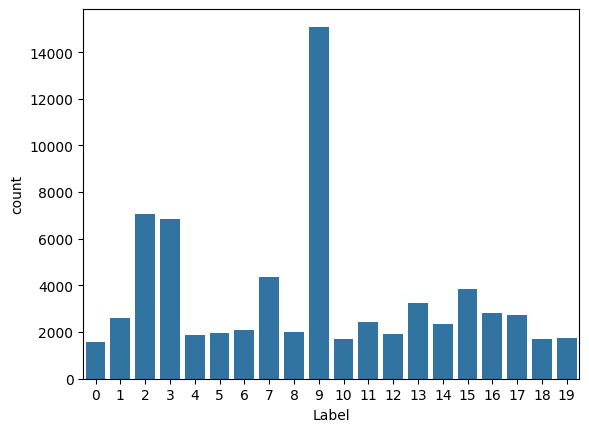

In [ ]:
sns.countplot(x = train_df['Label'])  # label 9 is highly biased

In [ ]:
# bring down the number 9 label to balance the data

# shuffle the dataset
train_df = train_df.sample(frac = 1)

# next highest value is number 2 with 7076 values
number_9_df = train_df.loc[train_df['Label'] == 9][:7076]
train_df = train_df[train_df.Label != 9]
train_df = pd.concat([train_df, number_9_df])
train_df = train_df.sample(frac = 1)
train_df.reset_index(drop = True, inplace = True)
train_df

,TEXT,Label
0,"Take a deep breath. :@so_derone @ Raleigh, NC\n",6
1,Bagels and lox #NYCBreakfast @ Upper East Side\n,16
2,Lol... @ Inglewood City Of Champions\n,3
3,Tomorrow night is going to be crazy. Hope to s...,9
4,Monterey Club and Italian Wedding Soup @ First...,10
...,...,...
61980,'Because I'm over forty now...' #FourThreeOnFo...,3
61981,Stayed up past my bedtime for a Buckhead night...,9
61982,"Time to decorate rileyhiggins4 @ Groton, Massa...",5
61983,Amazing time at @user - future #ninjawarrior o...,17


In [ ]:
train_df['Label'].value_counts()

Label
9     7076
2     7076
3     6842
7     4363
15    3843
13    3250
16    2832
17    2751
1     2592
11    2434
14    2342
6     2083
8     1992
5     1977
12    1909
4     1878
19    1745
18    1722
10    1721
0     1557
Name: count, dtype: int64

<Axes: xlabel='Label', ylabel='count'>

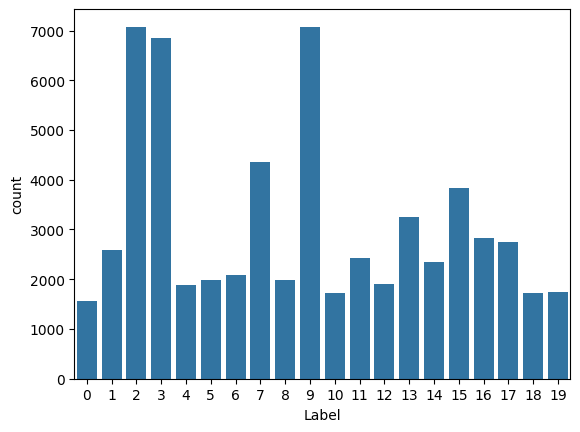

In [ ]:
sns.countplot(x = train_df['Label'])  # roughly equalised

In [ ]:
# How the actual Input DataFrame Should look like

df = pd.merge(train_df, map, left_on = 'Label', right_on = 'number', how = 'left')
df.drop(['Label', 'number'], axis = 1, inplace = True)
df

,TEXT,emoticons
0,"Take a deep breath. :@so_derone @ Raleigh, NC\n",📷
1,Bagels and lox #NYCBreakfast @ Upper East Side\n,😎
2,Lol... @ Inglewood City Of Champions\n,😂
3,Tomorrow night is going to be crazy. Hope to s...,❤
4,Monterey Club and Italian Wedding Soup @ First...,😁
...,...,...
61980,'Because I'm over forty now...' #FourThreeOnFo...,😂
61981,Stayed up past my bedtime for a Buckhead night...,❤
61982,"Time to decorate rileyhiggins4 @ Groton, Massa...",🎄
61983,Amazing time at @user - future #ninjawarrior o...,😊


In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/CognoRise Infotech/Machine Learning/Emoji_Prediction/Test.csv')
test_df.drop(['Unnamed: 0', 'id'], axis = 1, inplace = True)
test_df

,TEXT
0,Thought this was cool...#Repost (get_repost)・・...
1,Happy 4th! Corte madera parade. #everytownusa ...
2,Luv. Or at least something close to it. @ Unio...
3,There's a slice of pie under that whipped crea...
4,#thankyou for your thank you We adore you both...
...,...
25953,"Rest In Peace, Nana. thanks for playing cards ..."
25954,"I jus wan EAT #chowtime #swt30 @ Hartford, Con..."
25955,Playing Bloon SuperMonkey 2 #bloonsupermonkey2...
25956,Best Snow-cone I've EVER had!!! #bahamabucks #...


In [ ]:
test_df.head()

,TEXT
0,Thought this was cool...#Repost (get_repost)・・...
1,Happy 4th! Corte madera parade. #everytownusa ...
2,Luv. Or at least something close to it. @ Unio...
3,There's a slice of pie under that whipped crea...
4,#thankyou for your thank you We adore you both...


In [ ]:
test_df.tail()

,TEXT
25953,"Rest In Peace, Nana. thanks for playing cards ..."
25954,"I jus wan EAT #chowtime #swt30 @ Hartford, Con..."
25955,Playing Bloon SuperMonkey 2 #bloonsupermonkey2...
25956,Best Snow-cone I've EVER had!!! #bahamabucks #...
25957,You making my life better is just part of your...


In [ ]:
test_df.isna().sum()

TEXT    0
dtype: int64

In [ ]:
test_df.dtypes

TEXT    object
dtype: object

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
import re
from nltk.tokenize import word_tokenize
from nltk import SnowballStemmer

stemm = SnowballStemmer('english')
sw = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
train_text = train_df.TEXT
train_text

0          Take a deep breath. :@so_derone @ Raleigh, NC\n
1         Bagels and lox #NYCBreakfast @ Upper East Side\n
2                   Lol... @ Inglewood City Of Champions\n
3        Tomorrow night is going to be crazy. Hope to s...
4        Monterey Club and Italian Wedding Soup @ First...
                               ...                        
61980    'Because I'm over forty now...' #FourThreeOnFo...
61981    Stayed up past my bedtime for a Buckhead night...
61982    Time to decorate rileyhiggins4 @ Groton, Massa...
61983    Amazing time at @user - future #ninjawarrior o...
61984    the souls of some people shine so bright, that...
Name: TEXT, Length: 61985, dtype: object

In [ ]:
def clean(text):

  text = str(text).lower()  # convert to lowercase

  text = re.sub('[^a-z0-9]+', ' ', text)  # removes all regular expressions

  text = [stemm.stem(word) for word in text.split(' ') if (word not in sw) and len(word)>=3]  # stemming, removes stopwords and words with less than 3 characters
  text = ' '.join(text)

  return text

train_text = train_text.apply(clean)
train_text

0                           take deep breath deron raleigh
1                   bagel lox nycbreakfast upper east side
2                              lol inglewood citi champion
3        tomorrow night go crazi hope see mezcal tequil...
4        monterey club italian wed soup first watch por...
                               ...                        
61980    forti fourthreeonfourthre birthdaybehavior cha...
61981    stay past bedtim buckhead night betti park ben...
61982         time decor rileyhiggins4 groton massachusett
61983    amaz time user futur ninjawarrior hand ninjaz ...
61984    soul peopl shine bright even shadow bath light...
Name: TEXT, Length: 61985, dtype: object

In [ ]:
test_text = test_df.TEXT
test_text

0        Thought this was cool...#Repost (get_repost)・・...
1        Happy 4th! Corte madera parade. #everytownusa ...
2        Luv. Or at least something close to it. @ Unio...
3        There's a slice of pie under that whipped crea...
4        #thankyou for your thank you We adore you both...
                               ...                        
25953    Rest In Peace, Nana. thanks for playing cards ...
25954    I jus wan EAT #chowtime #swt30 @ Hartford, Con...
25955    Playing Bloon SuperMonkey 2 #bloonsupermonkey2...
25956    Best Snow-cone I've EVER had!!! #bahamabucks #...
25957    You making my life better is just part of your...
Name: TEXT, Length: 25958, dtype: object

In [ ]:
test_text = test_text.apply(clean)
test_text

0        thought cool repost get repost colorview shay ...
1        happi 4th cort madera parad everytownusa meric...
2        luv least someth close union hill richmond vir...
3                  slice pie whip cream houseofpi hous pie
4                thankyou thank ador plan moreeee host wed
                               ...                        
25953     rest peac nana thank play card lynn massachusett
25954       jus wan eat chowtim swt30 hartford connecticut
25955    play bloon supermonkey bloonsupermonkey2 bloon...
25956        best snow cone ever bahamabuck youhavetotryit
25957                          make life better part bless
Name: TEXT, Length: 25958, dtype: object

In [ ]:
# vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
x_train = vec.fit_transform(train_text)
x_test = vec.transform(test_text)
print(x_train)

  (0, 44260)	0.4296926205449112
  (0, 14747)	0.598484545431295
  (0, 8198)	0.44310839265186747
  (0, 14457)	0.4255517238253813
  (0, 52656)	0.282384814464
  (1, 48752)	0.2982504758385229
  (1, 16638)	0.29398349997381307
  (1, 57001)	0.37193837096281057
  (1, 39453)	0.505446227289464
  (1, 33036)	0.505446227289464
  (1, 4938)	0.41872476192418745
  (2, 10474)	0.5636207490952345
  (2, 11463)	0.3282787074258127
  (2, 26814)	0.6560749995093555
  (2, 32426)	0.3796450137417366
  (3, 53387)	0.5378983956041705
  (3, 35321)	0.5186682487176277
  (3, 47616)	0.22716396863417893
  (3, 25305)	0.2863765498849737
  (3, 13055)	0.30852622622234505
  (3, 21890)	0.27947182004795373
  (3, 38618)	0.21204515818864839
  (3, 55259)	0.2996289158773414
  (4, 13240)	0.3432513171461516
  (4, 42930)	0.44185428789675685
  :	:
  (61981, 50995)	0.2432852875114942
  (61981, 41183)	0.1764492588225613
  (61981, 38618)	0.1689010818529383
  (61982, 22888)	0.5780782678316556
  (61982, 45491)	0.5780782678316556
  (61982, 3438

In [ ]:
print(x_test)

  (0, 54693)	0.340078673068001
  (0, 48196)	0.49816837490858434
  (0, 45090)	0.5606268252390426
  (0, 26451)	0.42160206975849873
  (0, 21353)	0.2190812184050032
  (0, 12590)	0.3100442608808765
  (1, 41781)	0.40282761675005413
  (1, 41126)	0.36050845820598354
  (1, 35163)	0.3278205720716561
  (1, 33527)	0.47712901367198984
  (1, 23608)	0.1815719158755061
  (1, 12745)	0.5081873490811899
  (1, 1141)	0.2853461006980003
  (2, 57907)	0.31874117201941654
  (2, 56849)	0.35803628798322806
  (2, 49976)	0.32821476444655195
  (2, 45399)	0.4048842875545611
  (2, 33262)	0.38777205845885715
  (2, 31219)	0.3789835533198741
  (2, 24715)	0.2986383345584279
  (2, 11762)	0.3396723508933294
  (3, 59370)	0.37939280081790827
  (3, 49341)	0.4112696571199152
  (3, 42153)	0.7222885917294286
  (3, 25484)	0.24555502475177193
  :	:
  (25953, 53549)	0.19837958206497303
  (25953, 45157)	0.35695015800560287
  (25953, 42523)	0.2820731842121985
  (25953, 41514)	0.35639460875421136
  (25953, 37712)	0.4378226172466595
  

In [ ]:
y_train = train_df['Label']
y_train

0         6
1        16
2         3
3         9
4        10
         ..
61980     3
61981     9
61982     5
61983    17
61984    13
Name: Label, Length: 61985, dtype: int64

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = forest.predict(x_test)
y_pred

array([16, 11, 19, ...,  3,  2,  9])

In [ ]:
# Output as a DataFrame

df_output = pd.DataFrame({'TEXT':test_text, 'Label':y_pred})
df_output = pd.merge(df_output, map, left_on = 'Label', right_on = 'number', how = 'left')
df_result = df_output.drop(['number', 'Label' ], axis = 1)
df_result

,TEXT,emoticons
0,thought cool repost get repost colorview shay ...,😎
1,happi 4th cort madera parad everytownusa meric...,🇺🇸
2,luv least someth close union hill richmond vir...,💯
3,slice pie whip cream houseofpi hous pie,😍
4,thankyou thank ador plan moreeee host wed,❤
...,...,...
25953,rest peac nana thank play card lynn massachusett,❤
25954,jus wan eat chowtim swt30 hartford connecticut,😍
25955,play bloon supermonkey bloonsupermonkey2 bloon...,😂
25956,best snow cone ever bahamabuck youhavetotryit,😍


In [ ]:
pred = forest.predict(x_test[23013])
num = pred[0]
emoji = map.loc[(map['number']) == num].values[0][0]
emoji

'💯'